### RDKit Basics

Author: Vignesh Sathyaseelan (vsathyas@purdue.edu)

We read in the SMILES string of the molecule using `Chem.MolFromSmiles()` with an argument of `OCCC` which is the SMILES string that corresponds to propanol. Run the below code segment to load in the molecule from a SMILES string.

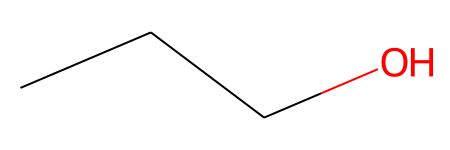

In [2]:
# Import a list of Subpackages from RDKit
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen
from rdkit.Chem.Draw import rdMolDraw2D

# Define and show Propanol
m = Chem.MolFromSmiles('OCCC')
m

We can get some information about individual atoms and bonds of the molecule.

In [3]:
# Print out Properties of Individual Atoms
print("Atom 0 Symbol: " + m.GetAtomWithIdx(0).GetSymbol())
print("Atom 0 is in Ring: " + str(m.GetAtomWithIdx(0).IsInRing()))
print("Bond between atom 0 and atom 1: " + str(m.GetBondBetweenAtoms(0,1).GetBondType()))

Atom 0 Symbol: O
Atom 0 is in Ring: False
Bond between atom 0 and atom 1: SINGLE


We can get information about the molecule as a whole including calculation of chemical properties.

In [4]:
# Print out Properties of the Molecule
print("Number of Atoms: " + str(m.GetNumAtoms()))
print("Molecular Weight: " + str(Descriptors.ExactMolWt(m)))
print("Number Valance Electrons: " + str(Descriptors.NumValenceElectrons(m)))
print("Molecular LogP: " + str(Descriptors.MolLogP(m)))
print("Topological Polar Surface Area: " + str(Descriptors.TPSA(m)))

Number of Atoms: 4
Molecular Weight: 60.057514876
Number Valance Electrons: 26
Molecular LogP: 0.3887
Topological Polar Surface Area: 20.23


We can highlight atoms and bonds in the molecule to showcase certian structural attributes. We need to use `IPython.display` to show the image as the RDKit drawing feature is not supported on the front end of Jupyter Notebook (There may be times where you need to do this again in the future as well).

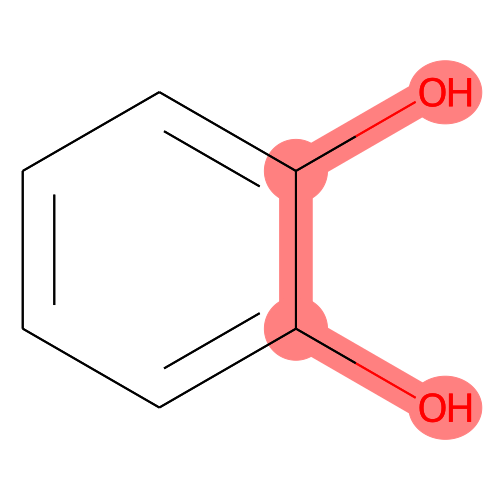

In [5]:
# Import Image Display Software for Jupyter Python Code
from IPython.display import Image

# Load in a Molecule
m = Chem.MolFromSmiles("Oc1ccccc1O")
# Set up an Image Canvas
d = rdMolDraw2D.MolDraw2DCairo(500, 500)
# Draw the Molecule to the Canvas with Specific Atoms and Bonds highlighted
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=[0,1,6,7], highlightBonds=[0,6,7])
d.DrawMolecule(m)
d.FinishDrawing()
# Write out the Image to a File and then Load in the File to the Notebook
d.WriteDrawingText('highlight_mol.png')  
Image(filename='highlight_mol.png') 

We can compare molecules and try to identify similar regions in certian molecues. Here are two benzodiazepines with similar, yet non-identical structures. What regions do you think will be similar in the below molecular structures.

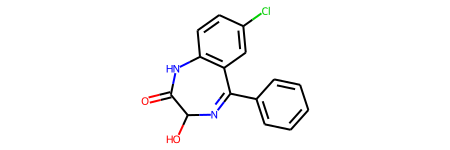

In [6]:
# Load in Both of the Molecules
m1 = Chem.MolFromSmiles('C1C(=O)NC2=C(C=C(C=C2)[N+](=O)[O-])C(=N1)C3=CC=CC=C3Cl')
m2 = Chem.MolFromSmiles('C1=CC=C(C=C1)C2=NC(C(=O)NC3=C2C=C(C=C3)Cl)O')

# Allow for more than one output for a notebook cell (Nothing to do with RDKit)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Print both molecules
m1
m2

Now run the code block below to see the regions of similarity between the two molecules. The green represent similar regions whereas the red represents regions that are different. The similarity is radius-based from the central atom, so the plot will look like a topography map. The darker green regions with higher topology have a higher degree of similarity than the lighter green regions with lower topology. The same principal applies for the red regions of disimilairty. 

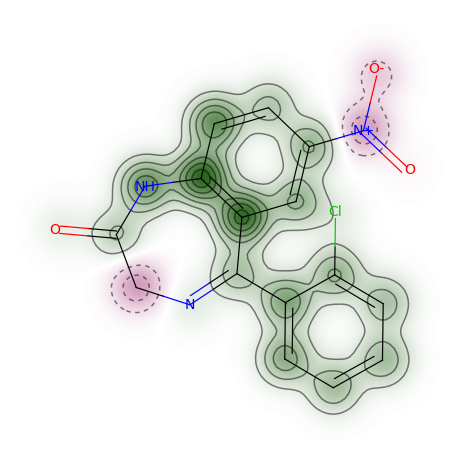

In [7]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
import matplotlib

fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(m2, m1, SimilarityMaps.GetMorganFingerprint)

We can also identify regions of interest for a specific descriptor. For example we can visualize contribution to molecular LogP using the following code.

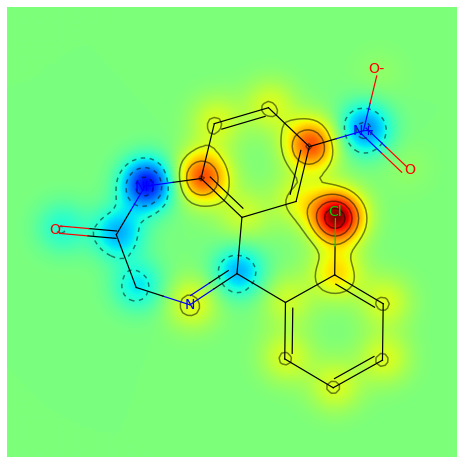

In [8]:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(m1)
fig = SimilarityMaps.GetSimilarityMapFromWeights(m1,[x for x,y in contribs], colorMap='jet', contourLines=10)

We can also visual partial charges of the molecule from the individual atoms (Think how this relates to TPSA).

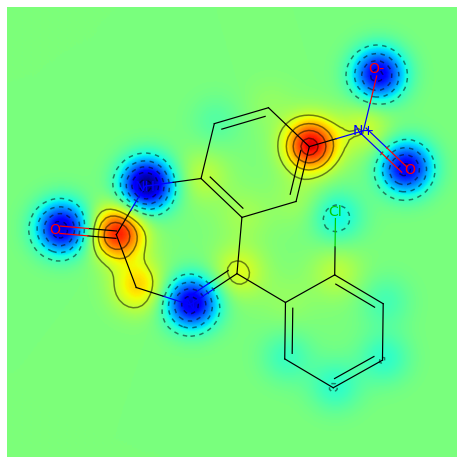

In [9]:
from rdkit.Chem import AllChem
AllChem.ComputeGasteigerCharges(m1)
contribs = [m1.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(m1.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(m1, contribs, colorMap='jet', contourLines=10)

## Part 3

### Question 6

Use RDKit to import two of your favriote drugs of the same drug class. If you dont have a favriote drug or drug class you can use [propionic acid derivatives NSAID's](https://en.wikipedia.org/wiki/Nonsteroidal_anti-inflammatory_drug#Propionic_acid_derivatives). You can get the SMILES string from the [PubChem Database](https://pubchem.ncbi.nlm.nih.gov/) or you can draw the structure in the SMILES translator described above. 

### Answer

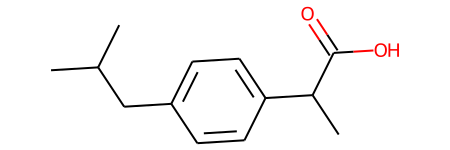

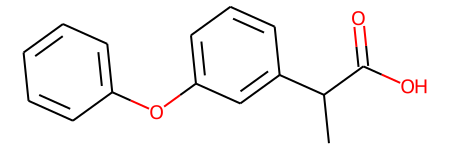

In [3]:
# I recomend readding all of the previous import statements above as if you exit out of the notebook you would need
# to rerun all of the previous code block to have access to the import statements again

# Add import statements here ...
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen
from rdkit.Chem.Draw import rdMolDraw2D

# Allow for more than one output for a notebook cell (You may need to rNothing to do with RDKit)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Your code goes here ...

# Define and show Propanol
I = Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O') #Ibuprofen
I

f = Chem.MolFromSmiles('CC(C1=CC(=CC=C1)OC2=CC=CC=C2)C(=O)O') #Fenoprofen
f

### Question 7



Print out the octanol-water partition coefficient (LogP) and topological polar surface area (TPSA) for both of your drugs. Check these values againts published values if possible (at least the LogP should be on PubChem). 

A higher LogP value indicates a molecule that is more attracted to the organic phase (non-polar). A higher TPSA value indicates a molecule with more of its surface area coming from polar atoms. Write a short explanation on if these LogP and TPSA values make sense relitave to the structures of the two drugs. What individual atoms do you think are making the most contribution tot he LogP of the molecule? What individual atoms or groups do you think are making the most contribution to the polarity and non-polarity of the molecule?

### Answer

In [4]:
# Your code goes here ...
print("For Ibuprofen")
print("Molecular LogP: " + str(Descriptors.MolLogP(I)))
print("Topological Polar Surface Area: " + str(Descriptors.TPSA(I)))
print("For Fenoprofen")
print("Molecular LogP: " + str(Descriptors.MolLogP(f)))
print("Topological Polar Surface Area: " + str(Descriptors.TPSA(f)))

For Ibuprofen
Molecular LogP: 3.073200000000001
Topological Polar Surface Area: 37.3
For Fenoprofen
Molecular LogP: 3.6670000000000025
Topological Polar Surface Area: 46.53


Lipophilicity is defined as the affinity of a molecule or moiety to a lipophilic environment. It is an important parameter described by the partition coefficient (P). Lipophilicity affects the biological activity of a drug because it plays a significant role in drug interactions with the receptor, the pharmacokinetics of the molecule, its toxic action, and in the pharmaceutical aspect—the solubility of the substance. While, The polar surface area (PSA) or topological polar surface area (TPSA) of a molecule is defined as the surface sum over all polar atoms or molecules, primarily oxygen and nitrogen, also including their attached hydrogen atoms.

We can note that Ibuprofen has lower logP and TPSA value. This might be due to the fact that Fenprene has a benzoyl ether functional group. The O atmo will add to the TPSA value while the presence of the bulky benzene group will cause it to be more lipophilic. Additionally, in both compounds the carboxy;ic group adds to the TPSA value and increases the affility to polar groups thereby reducing the logP value.

### Question 8

Get the similarity plot between the two molecule (it dosent matter which molecule you use as the reference, just keep it consistent througout the remainder of the assignment). Recreate this similarity plot by highlighting the similar atoms (no need to highlight the bonds) in green and the different atoms in red. To learn how to highlight in different colors open the [RDKit guide](https://www.rdkit.org/docs/GettingStartedInPython.html) and control+f (or whatever find is on Mac) "colours" (the british spelling).  

### Answer

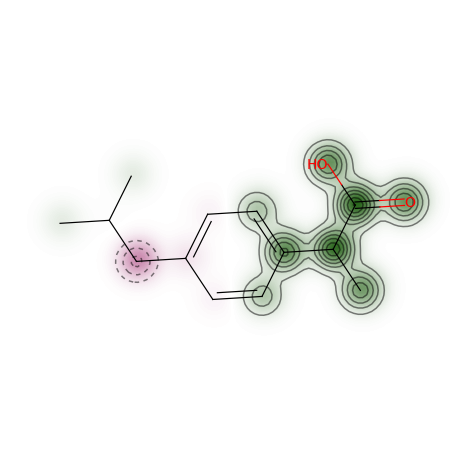

In [14]:
# Add the code for the similarity map here ...
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
import matplotlib

fig = SimilarityMaps.GetSimilarityMapForFingerprint(f, I, SimilarityMaps.GetMorganFingerprint)

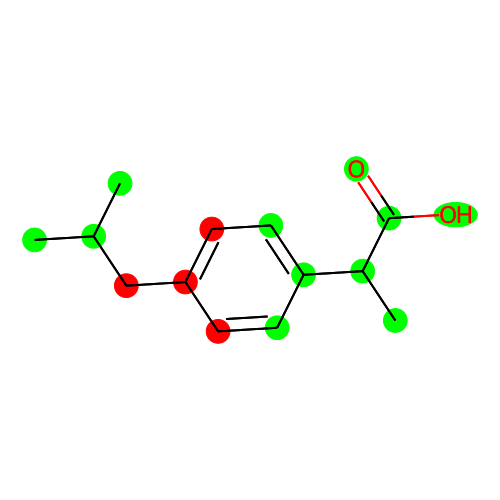

In [13]:
# Add the code for the highlighting here ...
# Import Image Display Software for Jupyter Python Code
from IPython.display import Image

# Load in a Molecules
I = Chem.MolFromSmiles("CC(C)CC1=CC=C(C=C1)C(C)C(=O)O")
f = Chem.MolFromSmiles('CC(C1=CC(=CC=C1)OC2=CC=CC=C2)C(=O)O')
# Set up an Image Canvas
d = rdMolDraw2D.MolDraw2DCairo(500, 500)
weights = SimilarityMaps.GetAtomicWeightsForFingerprint(f, I, SimilarityMaps.GetMorganFingerprint)
diff = []
colours = {}
for i in range(len(weights)):
    if (weights[i] < 0):
        colours[i] = (1,0,0)
        diff += [i]
    else:
        colours[i] = (0,1,0)
# Draw the Molecule to the Canvas with Specific Atoms and Bonds highlighted
rdMolDraw2D.PrepareAndDrawMolecule(d, I, highlightAtoms=list(range(I.GetNumAtoms())),highlightAtomColors=colours)
d.DrawMolecule(I)
d.FinishDrawing()
# Write out the Image to a File and then Load in the File to the Notebook
d.WriteDrawingText('highlight_mol_I.png')  
Image(filename='highlight_mol_I.png') 

### Question 9

Get the plot of LogP contributions for one of the two drugs you have chosen. Take note of the contributions and compare this list of atoms with the your answer to Question 7. Do these LogP individual contributions make sense? Is there anything that you missed?

### Answer

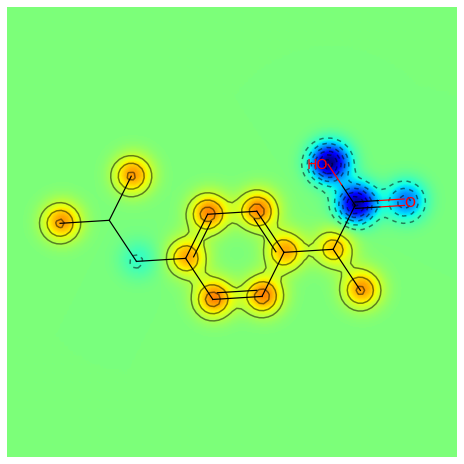

In [14]:
# Add the code for the plot here ... 
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(I)
fig = SimilarityMaps.GetSimilarityMapFromWeights(I,[x for x,y in contribs], colorMap='jet', contourLines=10)

We can note that the majority of the ontibution to LogP comes from the the non polar groups that is the conjugated benzene ring anf the R functional group attahced to it. Further, we can also not that the polar carboxyl group contriuts the least to LogP as its polar and will be more hydrophilic.

### Question 10

Get the plot of partial charges of the molecule. How does this plot relate to the TPSA of the molecule? Do the partial charges  that you see in the plot match up with your answer for Question 7? Do these partial charges make sense? Is there anything that you missed?

### Answer

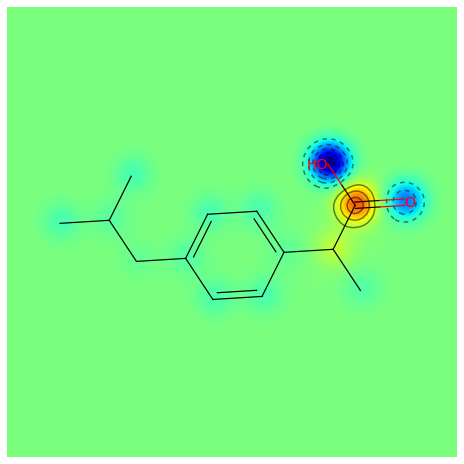

In [15]:
# Add the code for your plot here ...
from rdkit.Chem import AllChem
AllChem.ComputeGasteigerCharges(I)
contribs = [I.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(I.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(I, contribs, colorMap='jet', contourLines=10)

We can note here that the mojorty of the TPSA contribution comes from the carboxyl group. Further, the OH- and =O groups are more electro negative therefore the majority of the partial positive charge is going to be on the carbon atom and the partial negative charges will be shared between the OH- and =O groups. Further the =O seems to have more charge density than the OH- groups as its more electro negative.